# Mobile inverted pendulum python dynamics new

author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [1]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np

In [2]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [3]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

In [4]:
F = ReferenceFrame('F')

P = ReferenceFrame('P')

F = N.orientnew('F', 'Axis',[psi, N.z] )     # Intermediate reference frame

P = F.orientnew('P', 'Axis', [theta, F.y])   # Inverted Pendulum

기준프레임.dcm(상대프레임)

## Newtonian, Bodies, Frames, Particles, Points


In [5]:
Mp =sm.symbols('Mp')
M = sm.symbols('M')

Po = me.Point('p_cm')
Lo = me.Point('L_cm')
body_l_f = me.ReferenceFrame('L_f')

Ro = me.Point('R_cm')
body_r_f = me.ReferenceFrame('R_f')

frame_f = me.ReferenceFrame('f')
Ip = me.Point('I_p')
LN = me.Point('ln')
RN = me.Point('rn')

## Variables, Constants and Specified


In [6]:
x = me.dynamicsymbols('x')            # F1> measure number of Position of P in N
theta = me.dynamicsymbols('theta')    # F2> measure number of Angular Position of P in N
delta = me.dynamicsymbols('delta')    # N3> measure number of Angular Position of P in N
wL = me.dynamicsymbols('wL')          # Angular Position of L in N
wR = me.dynamicsymbols('wR')          # Angular Position of R in N


g = sm.symbols('g', real=True)        #Gravitational acceleration
d = sm.symbols('d', real=True)        # Distance from point I to Lo (or Ro)
R = sm.symbols('r', real=True)        #Radius of wheels
l = sm.symbols('l', real=True)        # Distance from point I to mass center of P
t = sm.symbols('t')


# Create q vectors
q = Matrix([x, theta, delta])


## Generalized speed

In [7]:
u1 = me.dynamicsymbols('u1')           #x-dot
u2 = me.dynamicsymbols('u2')           #theta-dot     
u3 = me.dynamicsymbols('u3')           #delta-dot   
u4 = me.dynamicsymbols('u4')           #wL-dot
u5 = me.dynamicsymbols('u5')           #wR-dot
uL = Matrix([u1, u2, u3])

## Mass and Inertia

관성모멘트함수=inertia(기준 좌표, xx, yy,zz회전)

In [8]:
K,J = symbols('K J')

In [9]:
I_L = inertia(F, K,J,K)                          #Wheel inertia 
I_R = inertia(F, K,J,K)


In [10]:
m_b = symbols('m_b')                              #Mass of the body
I1, I2, I3 = symbols('I1 I2 I3')                  #Moments of inertia of body

In [11]:
# Calculate inertia of body
Ib = inertia(F, I1, I2, I3)

###  Geometry relating unit vectors

In [12]:
F.orient(N, 'Axis', [delta, N.z])

In [13]:
P.orient(F, 'Axis', [theta, F.y])

In [14]:
N.dcm(F)

⎡cos(δ)  -sin(δ)  0⎤
⎢                  ⎥
⎢sin(δ)  cos(δ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [15]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Position vectors

기준.locatenew('이름', 이동*단위백터)

In [16]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

In [17]:
LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [18]:
F.set_ang_vel(N, u3*N.z)        # Angular velocity of F in N

P.set_ang_vel(F, u2*F.y)        # Angular velocity of P in F

body_l_f.set_ang_vel(F, u4*F.y)    # wL is related to w and v due to rolling

body_r_f.set_ang_vel(F, u5*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points


v2pt_theory는 선속도를 의미


$$^I\mathbf{v}^{P_2} = ^I\mathbf{v}^{P_1} + ^I\omega^A \times \mathbf{r}^{\frac{P_2}{P_1}}$$

The `Point.v2pt_theory()` method makes it easy to do this calculation.

측정점.v2pt_theory(회전 중심점, 관찰틀, 회전틀(돌아가는 애))



속도를 측정하는게 아니고 부여하는거 같다 좀더 알아보자

In [19]:
V_I_N = I.set_vel(N, u1*F.x)             # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

RigidBody =강체 선언 (입자로 저장된다고 한다)


 B = RigidBody ( '이름' ,질량 중심, 프레임 ,질량, ( I , P ))
 

In [20]:
body_p = me.RigidBody('p', Po, P, Mp, (Ib, Po))
body_l = me.RigidBody('l', Lo, body_l_f, M, (I_L, Lo))
body_r = me.RigidBody('r', Ro, body_r_f, M,(I_R, Ro))

### Forces

#### gravity

In [21]:
#중력벡터
Gravity = -g * N.z      #Gravity Vector

In [22]:
body_gravity_vector =-g*Mp*N.z

In [23]:
leftwheel_gravity_vector = - M*g*N.z

In [24]:
rightwheel_gravity_vector = - M*g*N.z

In [25]:
b_g_f = (Po, body_gravity_vector)

In [26]:
l_g_f = (Lo, leftwheel_gravity_vector)

In [27]:
r_g_f = (Ro, rightwheel_gravity_vector)

In [28]:
type(Po)

sympy.physics.vector.point.Point

In [29]:
type(body_gravity_vector)

sympy.physics.vector.vector.Vector

### Torques

바퀴가 받는 토크, 바퀴에 의해 생기는 몸의 반작용 토크

In [30]:
body_torque_scala, Lwheel_torque_scala, Rwheel_torque_scala = dynamicsymbols('T_b, T_r, T_l')

In [31]:
Lwheel_torque_vector = Lwheel_torque_scala * F.y

In [32]:
Rwheel_torque_vector = Rwheel_torque_scala * F.y

In [33]:
body_torque_vector = -Lwheel_torque_vector -Rwheel_torque_vector

In [34]:
Lwheel_torque = (body_l_f, Lwheel_torque_vector)

In [35]:
Rwheel_torque = (body_r_f, Rwheel_torque_vector)

In [36]:
body_torque = (P, body_torque_vector)

In [37]:
body_torque

(P, (-T_l(t) - T_r(t))*F.y)

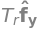

In [38]:
Lwheel_torque_vector

### Equations of Motions

q는 위치 dq 속력

In [39]:
q

⎡x⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣δ⎦

In [40]:
FL = [b_g_f,
         r_g_f,
         l_g_f,
         Lwheel_torque,
         Rwheel_torque,
         body_torque]
FL

[(Po, - Mp*g*N.z),
 (Ro, - M*g*N.z),
 (Lo, - M*g*N.z),
 (L_f, T_r(t)*F.y),
 (R_f, T_l(t)*F.y),
 (P, (-T_l(t) - T_r(t))*F.y)]

## Constraints

어떤 곳에 구속되어있는걸 Holonomic 이라고 하는듯 바퀴를 평면에 구속해야함

### holomic

In [41]:
Dependent1 =dot(V_LN_N ,F.x)

In [42]:
Dependent2 = dot(V_RN_N, F.x)

In [43]:
v_cons = [Dependent1,
          Dependent2]

v_cons

In [44]:
acc_cons = [Dependent1.diff(t),Dependent2.diff(t)] 

In [45]:
u_aux = [u4.diff(t), u5.diff(t)]

### nonholomic

In [46]:
nonholonomic = [LN.vel(N).dot(F.x),
                LN.vel(N).dot(F.y),
                LN.vel(N).dot(F.z)]

In [47]:
nonholonomic

# Kinematical Differential Equations

In [48]:
kde = [x.diff() - u1,
       theta.diff() - u2,
       delta.diff() - u3]
kde

# 운동방정식으로 만들자

## Generalized Forces

[토크힘] x [속도,각속도]

[Cm속도, 앞바퀴각속도, 뒷바퀴각속도, 몸체 각속도] x [중력, 앞바퀴토크, 뒷바퀴토크, Cm토크] 

VnWxTnF

In [49]:
from __future__ import print_function, division

In [50]:
from sympy import trigsimp
from sympy.physics.mechanics import KanesMethod
from sympy.functions import transpose

In [51]:
from sympy.physics.vector import init_vprinting

In [52]:
BL = [body_p,body_l,body_r]
BL

[p, l, r]

In [53]:
kane = KanesMethod(
    N,
    q,
    uL,
    kd_eqs=kde,
    q_dependent=None,
    configuration_constraints=None,
    u_dependent=[u4,u5],
    velocity_constraints=v_cons,
    acceleration_constraints=acc_cons,
    u_auxiliary=u_aux,
    bodies=None,
    forcelist=None,
)

In [54]:
fr, frstar = kane.kanes_equations( BL, FL)

In [55]:
kane.kindiffdict()

### F + F* =0 식 (Kanes equation)

In [56]:
kanearray = trigsimp(fr + frstar)

In [58]:
update0 =kanearray.expand()

In [59]:
update1=update0.subs(sin(theta) , theta)

In [60]:
update2 = update1.subs(cos(theta) , 1)

In [61]:
update3 = update2.subs(sin(2*theta) , 2 *theta)

In [62]:
update3

⎡                 J⋅u₄̇   J⋅u₅̇                     2            2            
⎢               - ──── - ──── - 2⋅M⋅u₁̇ + Mp⋅l⋅θ⋅u₂  + Mp⋅l⋅θ⋅u₃  - Mp⋅l⋅u₂̇ -
⎢                  r      r                                                   
⎢                                                                             
⎢                                              2     2       2                
⎢                      -I₂⋅u₂̇ + Mp⋅g⋅l⋅θ + Mp⋅l ⋅θ⋅u₃  - Mp⋅l ⋅u₂̇ - Mp⋅l⋅u₁̇
⎢                                                                             
⎢         J⋅d⋅u₄̇   J⋅d⋅u₅̇                 2          2  2            2      
⎢-I₃⋅u₃̇ + ────── - ────── - 2⋅K⋅u₃̇ - 2⋅M⋅d ⋅u₃̇ - Mp⋅l ⋅θ ⋅u₃̇ - 2⋅Mp⋅l ⋅θ⋅u
⎢           r        r                                                        
⎢                                                                             
⎢                                                    0                        
⎢                                                   

In [63]:
update4 = update3.row_del(3)

In [65]:
update5 = update4.row_del(3)

In [66]:
update6 = update5.subs(theta*u3,0)

In [67]:
update7 = update6.subs(theta*u1,0)

In [70]:
linear = update7.subs(theta*u3.diff(),0)

In [94]:
linear = trigsimp(linear)
linear

⎡  J⋅u₄̇   J⋅u₅̇                     2                     Tₗ   Tᵣ⎤
⎢- ──── - ──── - 2⋅M⋅u₁̇ + Mp⋅l⋅θ⋅u₂  - Mp⋅l⋅u₂̇ - Mp⋅u₁̇ + ── + ──⎥
⎢   r      r                                             r    r ⎥
⎢                                                               ⎥
⎢                               2                               ⎥
⎢       -I₂⋅u₂̇ + Mp⋅g⋅l⋅θ - Mp⋅l ⋅u₂̇ - Mp⋅l⋅u₁̇ - Tₗ - Tᵣ        ⎥
⎢                                                               ⎥
⎢           J⋅d⋅u₄̇   J⋅d⋅u₅̇                 2      d⋅Tₗ   d⋅Tᵣ  ⎥
⎢  -I₃⋅u₃̇ + ────── - ────── - 2⋅K⋅u₃̇ - 2⋅M⋅d ⋅u₃̇ + ──── - ────  ⎥
⎣             r        r                            r      r    ⎦

In [95]:
uL.diff()

⎡u₁̇⎤
⎢  ⎥
⎢u₂̇⎥
⎢  ⎥
⎣u₃̇⎦

In [96]:
q

⎡x⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣δ⎦

In [97]:
linear.jacobian(uL.diff())

⎡-2⋅M - Mp     -Mp⋅l             0         ⎤
⎢                                          ⎥
⎢                     2                    ⎥
⎢  -Mp⋅l    -I₂ - Mp⋅l           0         ⎥
⎢                                          ⎥
⎢                                         2⎥
⎣    0           0       -I₃ - 2⋅K - 2⋅M⋅d ⎦

In [98]:
torques = Matrix([Lwheel_torque_scala,Rwheel_torque_scala])
torques

⎡Tᵣ⎤
⎢  ⎥
⎣Tₗ⎦

In [99]:
linear.jacobian(torques)

⎡ 1   1 ⎤
⎢ ─   ─ ⎥
⎢ r   r ⎥
⎢       ⎥
⎢-1   -1⎥
⎢       ⎥
⎢-d   d ⎥
⎢───  ─ ⎥
⎣ r   r ⎦

In [100]:
linear.jacobian(q)

⎡          2   ⎤
⎢0  Mp⋅l⋅u₂   0⎥
⎢              ⎥
⎢0   Mp⋅g⋅l   0⎥
⎢              ⎥
⎣0     0      0⎦

In [101]:
uL

⎡u₁⎤
⎢  ⎥
⎢u₂⎥
⎢  ⎥
⎣u₃⎦

In [125]:
xdotform = Matrix([1,2,3])

In [126]:
sols = sm.linsolve(linear,u1.diff(),u2.diff(), u3.diff())

In [127]:
(xdotform[0], xdotform[1], xdotform[2]) = tuple(*sols)

u2,u3 에서 nonlinear 로 안풀린다

In [130]:
A = xdotform.jacobian(uL)
A.simplify()
A

⎡           ⎛         2⎞         ⎤
⎢    2⋅Mp⋅l⋅⎝I₂ + Mp⋅l ⎠⋅θ⋅u₂    ⎥
⎢0  ──────────────────────────  0⎥
⎢                            2   ⎥
⎢   2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l    ⎥
⎢                                ⎥
⎢             2  2               ⎥
⎢        -2⋅Mp ⋅l ⋅θ⋅u₂          ⎥
⎢0  ──────────────────────────  0⎥
⎢                            2   ⎥
⎢   2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l    ⎥
⎢                                ⎥
⎣0              0               0⎦

In [131]:
B = xdotform.jacobian(torques)
B.simplify()
B

⎡              2                               2               ⎤
⎢     I₂ + Mp⋅l  + Mp⋅l⋅r             I₂ + Mp⋅l  + Mp⋅l⋅r      ⎥
⎢──────────────────────────────  ──────────────────────────────⎥
⎢  ⎛                         2⎞    ⎛                         2⎞⎥
⎢r⋅⎝2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l ⎠  r⋅⎝2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l ⎠⎥
⎢                                                              ⎥
⎢   -(2⋅M⋅r + Mp⋅l + Mp⋅r)          -(2⋅M⋅r + Mp⋅l + Mp⋅r)     ⎥
⎢──────────────────────────────  ──────────────────────────────⎥
⎢  ⎛                         2⎞    ⎛                         2⎞⎥
⎢r⋅⎝2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l ⎠  r⋅⎝2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l ⎠⎥
⎢                                                              ⎥
⎢             -d                               d               ⎥
⎢    ─────────────────────           ─────────────────────     ⎥
⎢      ⎛                2⎞             ⎛                2⎞     ⎥
⎣    r⋅⎝I₃ + 2⋅K + 2⋅M⋅d ⎠           r⋅⎝I₃ + 2⋅K + 2⋅M⋅d ⎠     ⎦

# Simulation

In [ ]:
from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi
from numpy.linalg import solve
from scipy.integrate import odeint

# Motor Dynamics

In [ ]:
Kt = symbols('Kt')     #motor torque constant

I_r, I_l = sm.symbols('I_r, I_l')       #motor amp

#모터 토크선언
L_torque, R_torque = dynamicsymbols('tau_f, tau_r')

L_torque = Kt * I_l

R_torque = Kt * I_r

#토크벡터 (바퀴>몸체로 전달하는 토크)
motor_L = L_torque/R * F.y
motor_R = R_torque/R * F.y
di = [motor_L,
      motor_R]


In [ ]:
aug_rhs = linear.col_join(di)

### System parameter

In [ ]:
parameters= [g, m_b ,m_wf, m_wr]
parameter_vals=[9.81, 10., 5., 3.]
parameter_dict = dict(zip(parameters, parameter_vals))
parameter_dict